 # **Master in Data Science - Machine Learning**

Authors: Frida Ibarra Y Gema Romero

### **Notebook 6. Model explainability: SHAP**

In this practice, we will explore the **model explainability** using **SHAP (SHapley Additive exPlanations)**. SHAP is a technique that allows us to understand how each feature influences the model's predictions, providing valuable insights into its decision-making process. By analyzing SHAP values, we can identify which characteristics have a significant impact on predicting defaults and how the model assigns importance to each of them.

Understanding these relationships not only improves model transparency but also aids in optimization and informed decision-making—crucial for adjusting lending strategies and minimizing financial risks.

### Libraries

In [1]:
import shap
from ipywidgets import interact
from joblib import dump, load
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

shap.initjs()

ModuleNotFoundError: No module named 'shap'

In [2]:
!pip install shap

     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   --------------------------------------- 456.1/456.1 kB 27.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -------------------------------------- - 2.6/2.7 MB 83.6 MB/s eta 0:00:01
   ---------------------------------------  2.7/2.7 MB 56.9 MB/s eta 0:00:01
   ---------------------------------------  2.7/2.7 MB 56.9 MB/s eta 0:00:01
   ---------------------------------------  2.7/2.7 MB 56.9 MB/s eta 0:00:01
   ------------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\bris2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### AUXILIAR FUNCTIONS

In [3]:
sys.path.append('../src')  # Asegurtarse de que ../src es la carpeta donde está Funciones_Ayuda.py
import functions_src as fa  # Ahora debería importarse correctamente
sys.path.remove('../src')

#Seed 
seed = 25

In [4]:
df_loans_train = pd.read_csv('../data/Processing_data/df_loans_train_resampled.csv')
df_loans_test = pd.read_csv('../data/Processing_data/df_loans_test_cut.csv')
df_loans_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE_missing,NAME_TYPE_SUITE_Group of people,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Unemployed,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Co-op apartment,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMIN_MODE,LIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE_missing,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,HOUSETYPE_MODE_missing,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_specific housing,WALLSMATERIAL_MODE_missing,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,EMERGENCYSTATE_MODE_missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,FLAG_DOCUMENT_2,FLAG_DOCUMENT_8,FLAG_DOCUMENT_11,FLAG_DOCUMENT_16,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_EDUCATION_TYPE_ORDINAL,WEEKDAY_APPR_PROCESS_START_ORDINAL,OCCUPATION_TYPE_MEAN,TARGET
0,1.482944,0.324103,-0.324103,-1.384932,1.384982,-0.004032,0.716969,-0.716969,-0.665301,0.665301,-0.577365,-0.165129,-0.928947,-1.175569,-0.848134,-0.065189,-0.029781,-1.033335,-0.550989,-0.275698,-0.004508,-0.006049,-0.008313,-1.328570,3.057555,-0.235098,-0.262467,-0.417105,0.356817,-0.19444,-0.225169,-0.127727,-0.093034,-0.060291,-1.613114,2.134588,-0.146275,0.002016,-2.134535,-0.499666,0.044123,1.598398,-0.245406,-0.166762,-0.103735,-0.063215,-0.327627,-0.206529,-0.467976,-1.363261,0.011026,-0.551427,0.565381,0.012981,-0.165351,-0.368302,-0.082579,-0.083397,-0.140632,-0.149356,-0.099818,-0.230110,0.026071,-0.168474,-0.355921,-0.050833,-0.070287,-0.159456,-0.094503,-0.237963,0.013252,-0.166514,-0.365151,-0.078828,-0.082291,-0.141441,-0.151557,-0.098784,-0.231454,0.678940,-0.201525,-0.561708,-0.136934,-0.136317,-1.004416,1.022255,-0.063015,-0.069778,-1.018322,-0.075816,-0.072802,-0.950192,0.964886,-0.087849,-0.005703,-0.297606,-0.061999,-0.100151,-0.018809,-0.070444,-0.058838,-0.155317,-0.270689,-0.294438,-1.007520,-0.582747,0.263041,-0.722256,0
1,-0.190267,0.324103,-0.324103,0.722057,-0.722031,-0.004032,-1.394761,1.394761,-0.665301,0.665301,-0.577365,0.128295,-1.162828,-1.256165,-1.176930,-0.065189,-0.029781,0.967741,-0.550989,-0.275698,-0.004508,-0.006049,-0.008313,0.752689,-0.327059,-0.235098,-0.262467,-0.417105,0.356817,-0.19444,-0.225169,-0.127727,-0.093034,-0.060291,1.357658,-0.455410,1.403574,0.002016,0.468486,-0.499666,0.044123,-0.625627,-0.245406,-0.166762,-0.103735,-0.063215,1.204471,-0.206529,-0.467976,0.643345,0.011026,0.549245,0.112514,0.012981,-0.165351

In [5]:
# Se va a eliminar la primera columna que repite el Index
df_loans_test = df_loans_test.drop('Unnamed: 0',axis=1)

In [6]:
X_train = df_loans_train.drop('TARGET', axis=1)
y_train = df_loans_train['TARGET']
X_test=df_loans_test.drop("TARGET", axis=1)
y_test=df_loans_test["TARGET"]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((271377, 108), (271377,), (61503, 108), (61503,))

In [7]:
xgb_random=load('../models/best_xgb_model.joblib')

In [8]:
# Crea un objeto Explainer de SHAP para el modelo XGBoost
explainer = shap.TreeExplainer(xgb_random)

# Calcula los valores de SHAP para todo el conjunto de datos de entrenamiento
shap_values = explainer.shap_values(X_train)
print(shap_values)

[[-0.03278302  0.00280617  0.00146322 ...  0.04806045  0.01631495
  -0.2551414 ]
 [ 0.00140121  0.00476545  0.0007264  ...  0.04225691  0.01142205
  -0.05705356]
 [ 0.00190585  0.00601271  0.00177125 ...  0.03106706 -0.3149424
   0.07396396]
 ...
 [ 0.00139078  0.00515961  0.00110358 ...  0.31287083  0.2834324
   0.04021052]
 [ 0.00107468  0.00564921  0.00171123 ...  0.03295486  0.29370666
   0.1514311 ]
 [ 0.00156592  0.0046526   0.00075728 ...  0.0353168  -0.00803198
   0.04069047]]


En conclusión, los valores SHAP obtenidos muestran cómo cada característica contribuye a la predicción del impago de un préstamo en el modelo XGBoost. Los valores positivos indican que una característica aumenta la probabilidad de impago, mientras que los negativos la reducen. Las características con valores SHAP de mayor magnitud tienen un impacto más significativo en la predicción, y aquellos cercanos a cero tienen una influencia menor. Este análisis permite identificar las variables clave que afectan la decisión del modelo, lo que puede ser útil para interpretar y mejorar el modelo. Visualizaciones adicionales, como el gráfico de importancia de características SHAP, pueden ofrecer una visión más clara de estas influencias.

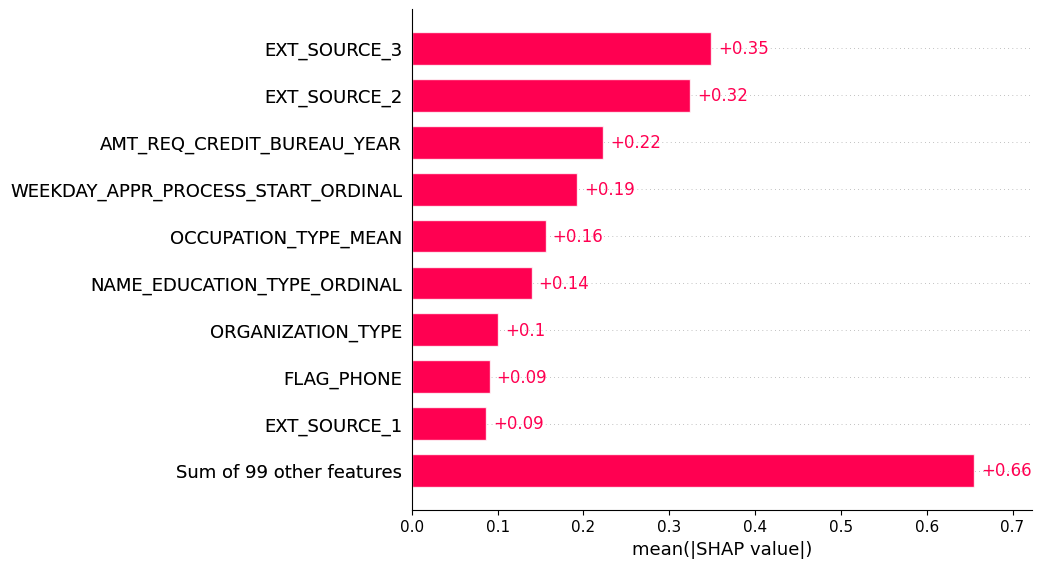

In [9]:
#grafico que permite interpretar las salida de los valores de shap 
shap_explanation = shap.Explanation(values=shap_values,base_values=explainer.expected_value,data=X_test,feature_names=X_test.columns)
shap.plots.bar(shap_explanation)

In [10]:
shap.force_plot(explainer.expected_value,shap_values[0],X_test.iloc[0,:])

In [11]:
shap.force_plot(explainer.expected_value,shap_values[:200,:],features=X_test.loc[:200,:])

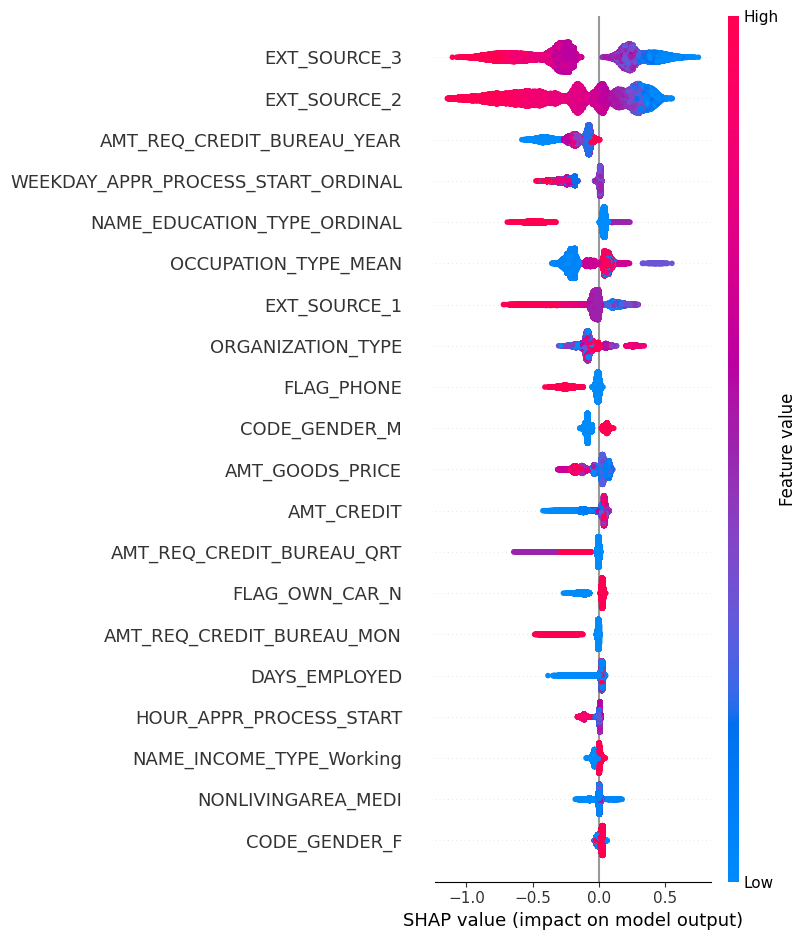

In [12]:
# Calcula los valores de SHAP para todo el conjunto de datos de prueba
shap_values_test = explainer.shap_values(X_test)
# Luego grafica el resumen de los valores SHAP para el conjunto de prueba
plt.rcParams.update({"ytick.labelsize":8})
shap.summary_plot(shap_values_test, features=X_test)
plt.rcdefaults()

dpd

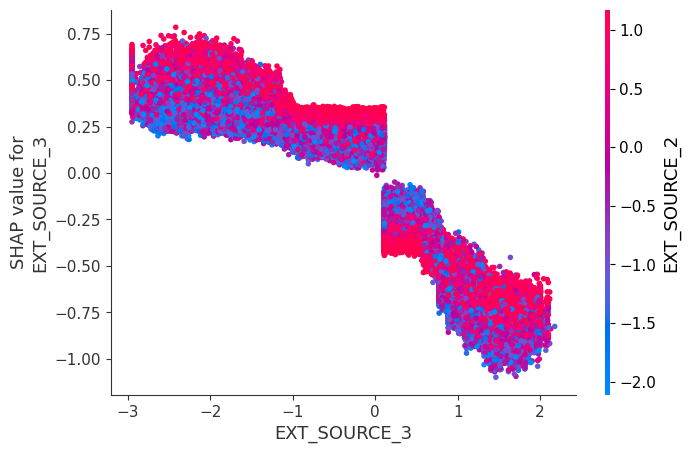

In [12]:
# Crear un gráfico de dependencia para una característica específica
# Por ejemplo, analizamos 'EXT_SOURCE_3' y su interacción con 'EXT_SOURCE_2'
shap.dependence_plot(
    "EXT_SOURCE_3",  # Nombre de la característica principal
    shap_values,     # Valores de SHAP calculados previamente
    X_train,         # Conjunto de datos de entrada utilizado para entrenar el modelo
    interaction_index="EXT_SOURCE_2"  # Variable de interacción (opcional, se selecciona automáticamente si se deja vacío)
)

# Mostrar el gráfico
plt.show()

Este gráfico muestra cómo los valores de SHAP para EXT_SOURCE_3 cambian con sus propios valores, dependiendo de la variable EXT_SOURCE_2. A medida que EXT_SOURCE_3 aumenta, el impacto en el modelo pasa de positivo a negativo, sugiriendo una relación no lineal. Los valores más altos de EXT_SOURCE_2 están asociados con un impacto positivo mayor de EXT_SOURCE_3, indicando una posible correlación positiva entre ambas variables en la predicción del modelo.

### Conclusiones Análisis SHAP
El análisis con SHAP ha permitido identificar las variables más importantes que impulsan las predicciones del modelo. Las fuentes externas de datos (EXT_SOURCE_3, EXT_SOURCE_2 y EXT_SOURCE_1) son las características principales, lo que indica que tienen una fuerte relación con el objetivo. Estas variables parecen reflejar factores externos clave para evaluar el riesgo crediticio.

Otras variables relevantes incluyen el historial de solicitudes de crédito (AMT_REQ_CREDIT_BUREAU_YEAR), características laborales (OCCUPATION_TYPE_MEAN) y educativas (NAME_EDUCATION_TYPE_ORDINAL). Esto sugiere que el perfil laboral y educativo del cliente también impactan en las predicciones. Además, el tipo de organización donde trabaja el cliente (ORGANIZATION_TYPE) tiene una influencia moderada.

El gráfico muestra que, aunque las variables principales concentran gran parte de la importancia, otras características como FLAG_PHONE y variables temporales (WEEKDAY_APPR_PROCESS_START_ORDINAL) también contribuyen al modelo. Sin embargo, el impacto acumulado de las variables restantes es diluido, lo que resalta la multidimensionalidad del modelo.

Para profundizar, sería útil analizar las relaciones entre las variables principales y el objetivo, utilizando gráficos de dependencia. También se podría explorar las interacciones entre variables clave para identificar efectos no lineales. Por último, validar la estabilidad del modelo en diferentes subconjuntos de datos garantizará su robustez.